In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import warnings
import functools
import seaborn as sns
import scipy.stats
import anndata
import tools

warnings.filterwarnings('ignore')
os.chdir(os.path.expanduser('/lustre/scratch117/cellgen/team297/kt16/Prostate_analysis/scanpy'))
sc.settings.verbosity = 3
sc.logging.print_header()

scanpy==1.7.2 anndata==0.7.6 umap==0.5.1 numpy==1.20.2 scipy==1.6.2 pandas==1.2.4 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.9.1


In [2]:
# read in the crowley data
adata = sc.read_h5ad('dataset/Crowley/crowley_filtered.h5ad')
adata

AnnData object with n_obs × n_vars = 3309 × 2143
    obs: 'barcode', 'study', 'sample', 'group', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'is_doublet', 'filter_rna', 'leiden', 'celltypes'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'celltypes_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'rank_genes_groups', 'sample_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

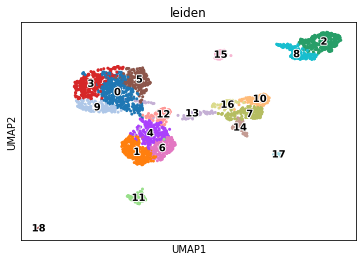

In [7]:
sc.pl.umap(adata, color = 'leiden', legend_loc = 'on data', legend_fontoutline = 2)

In [3]:
# perform a wilcoxon rank sum test
sc.tl.rank_genes_groups(adata, groupby = 'leiden', method = 'wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:06)


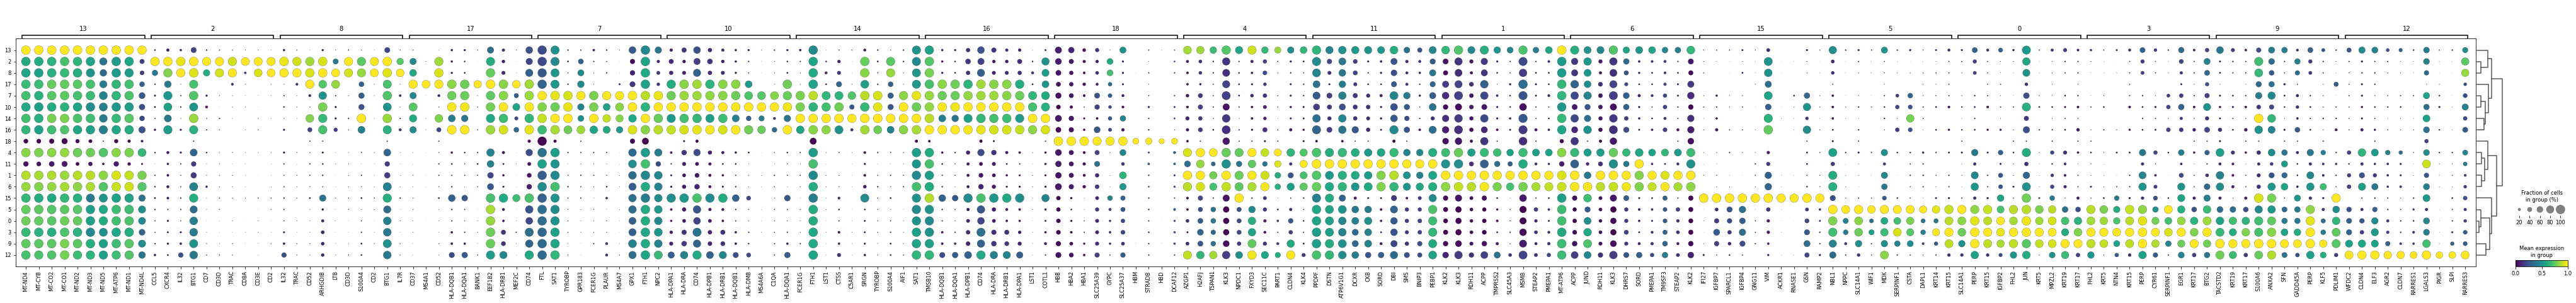

In [20]:
# check top marker genes
sc.pl.rank_genes_groups_dotplot(adata, n_genes = 10, min_logfoldchange = 2, standard_scale = 'var', color_map = 'viridis')

In [22]:
from tools import returnDEres

In [26]:
returnDEres(adata, column = '13').head(20)

,scores,logfoldchanges,pvals,pvals_adj
MTRNR2L12,12.462713,4.443542,1.192439e-35,1.925094e-32
MTRNR2L8,11.238623,4.025769,2.634596e-29,3.926156e-26
AZGP1,9.035204,2.680162,1.636972e-19,1.865474e-16
KLK3,8.430721,3.126060,3.435410e-17,3.025191e-14
PLCG2,8.296667,3.699029,1.070733e-16,8.643044e-14
MSMB,8.263541,2.709812,1.414134e-16,1.095841e-13
VEGFA,7.847230,2.501111,4.253273e-15,2.746622e-12
KLK2,7.695750,2.701501,1.406668e-14,7.569828e-12
ADIRF,7.624266,2.371557,2.454278e-14,1.251230e-11
ACPP,7.596258,2.647145,3.048157e-14,1.514152e-11


In [27]:
returnDEres(adata, column = '5').head(20)

,scores,logfoldchanges,pvals,pvals_adj
NBL1,20.160833,3.009199,2.162078e-90,4.188593e-86
NPPC,19.937483,4.897512,1.925080e-88,1.864729e-84
SLC14A1,19.525295,3.974043,6.692964e-85,4.322093e-81
GNB2L1,19.063341,1.497732,5.091642e-81,2.466010e-77
WIF1,18.554308,4.508790,7.527069e-77,2.916438e-73
CIRBP,18.219265,1.653757,3.630033e-74,1.172077e-70
MDK,18.077765,2.841453,4.770396e-73,1.320241e-69
HNRNPA1,17.586555,1.488229,3.122946e-69,7.562605e-66
SERPINF1,17.579866,3.435967,3.514056e-69,7.564201e-66
BTF3,17.490482,1.550941,1.693195e-68,3.280227e-65


categories: 0, 1, 2, etc.
var_group_labels: BE, HE
, CE, etc.


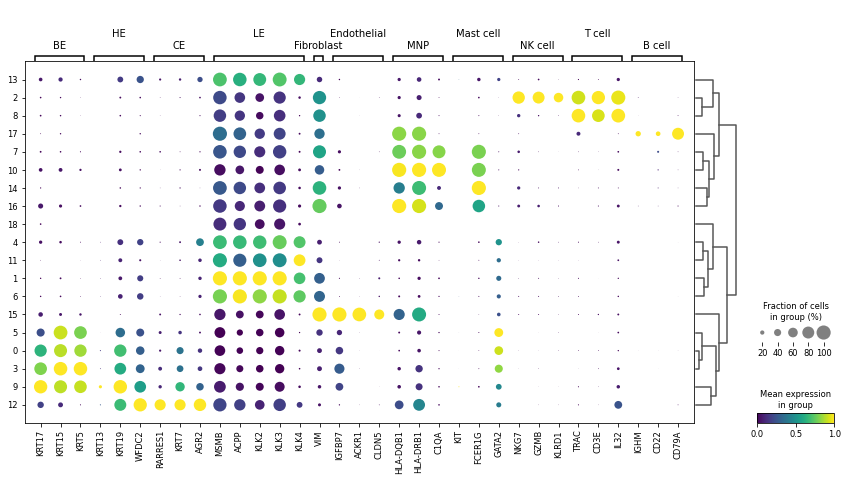

In [17]:
marker_dict = {'BE':['KRT17', 'KRT15', 'KRT5'],
               'HE\n':['KRT13', 'KRT19', 'WFDC2'],
               'CE':['RARRES1', 'KRT7', 'AGR2'],
               'LE\n':['MSMB', 'ACPP', 'KLK2', 'KLK3', 'KLK4'],
               # 'Fibroblast':['VIM', 'DCN', 'LUM'],
               'Fibroblast':['VIM'],
               'Endothelial\n':['IGFBP7', 'ACKR1', 'CLDN5'],
               'MNP':['HLA-DQB1', 'HLA-DRB1', 'C1QA'],
               'Mast cell\n':['KIT', 'FCER1G', 'GATA2'],
               'NK cell':['NKG7', 'GZMB', 'KLRD1'],
               'T cell\n':['TRAC', 'CD3E', 'IL32'],
               'B cell':['IGHM', 'CD22', 'CD79A']}
sc.pl.dotplot(adata, 
                     marker_dict, 
                     standard_scale = 'var', 
                     groupby = 'leiden', 
                     var_group_rotation = False, 
                     linewidth = 0,
                     dendrogram = True,
                     color_map = 'viridis')

In [3]:
from tools import cmp

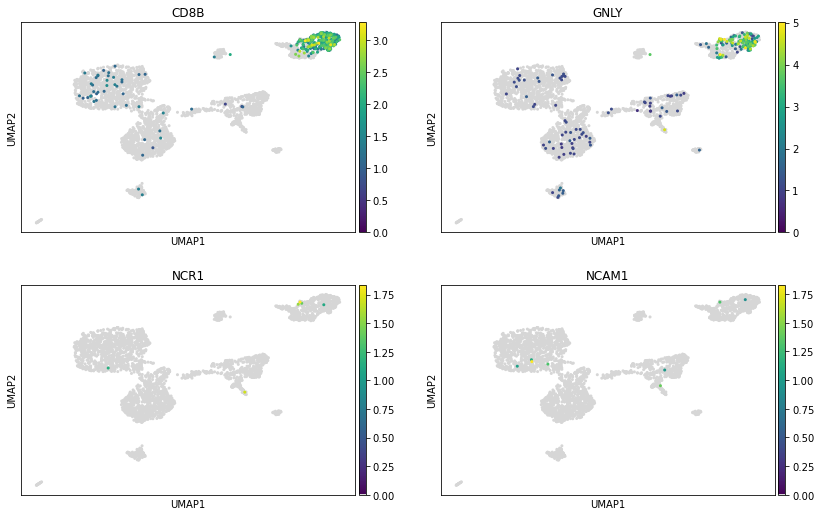

In [29]:
sc.pl.umap(adata, color = ['CD8B', 'GNLY', 'NCR1', 'NCAM1'], color_map = cmp(), ncols = 2)

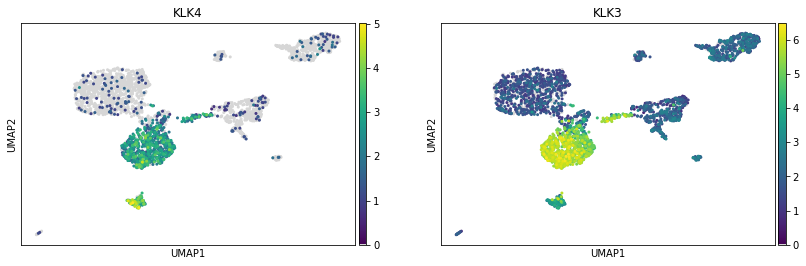

In [30]:
sc.pl.umap(adata, color = ['KLK4', 'KLK3'], color_map = cmp(), ncols = 2)

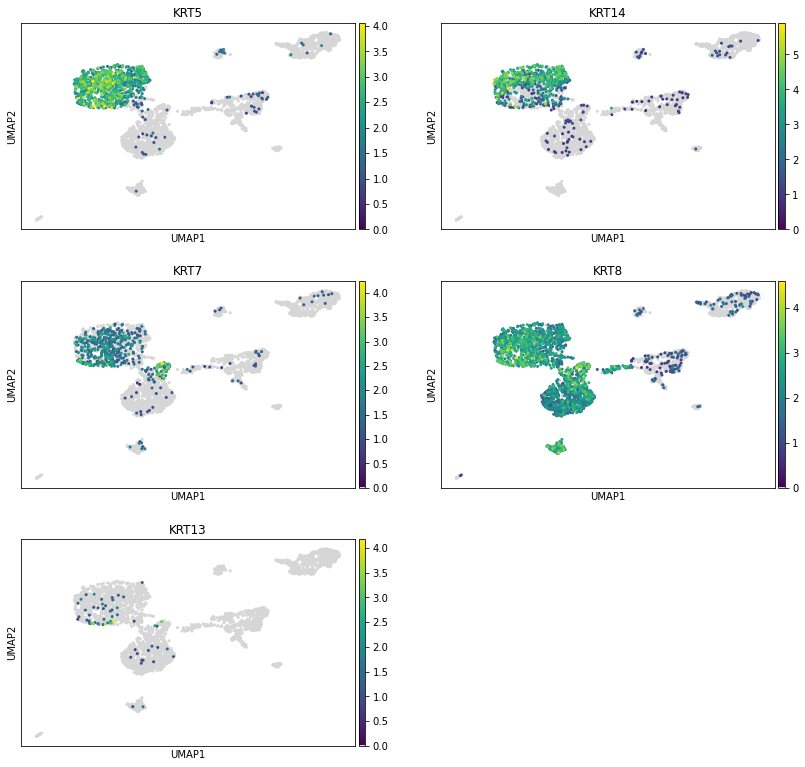

In [36]:
sc.pl.umap(adata, color = ['KRT5', 'KRT14', 'KRT7', 'KRT8', 'KRT13'], color_map = cmp(), ncols = 2)

In [38]:
cols = {'BE': '#1c4481',
        'HE': '#60688d',
        'CE': '#1f77b4',
        'LE-KLK3': '#5b8ba1',
        'LE-KLK4': '#b4d5de',
        # 'Fibroblast': '#59a14f',
        'Endothelial': '#8cd17d',
        'MNP': '#c7233b',
        # 'Mast cell': '#d37295',
        # 'NK cell': '#ff9d9a',
        'T cell': '#f28e2b',
        'B cell': '#fcbf10',
        # 'Sperm': '#727272',
        'Erythrocyte': '#727272',
       }

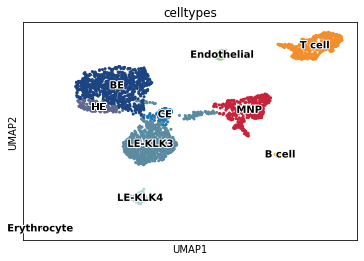

In [46]:
celltypes = {'0':'BE',
'1':'LE-KLK3',
'2':'T cell',
'3':'BE',
'4':'LE-KLK3',
'5':'BE',
'6':'LE-KLK3',
'7':'MNP',
'8':'T cell',
'9':'HE',
'10':'MNP',
'11':'LE-KLK4',
'12':'CE',
'13':'LE-KLK3',
'14':'MNP',
'15':'Endothelial',
'16':'MNP',
'17':'B cell',
'18':'Erythrocyte',}
adata.obs['celltypes'] = [celltypes[l] for l in adata.obs['leiden']]
adata.obs['celltypes'] = adata.obs['celltypes'].astype('category')
adata.obs['celltypes'] = adata.obs['celltypes'].cat.reorder_categories([k for k in cols.keys() if k in list(adata.obs['celltypes'])])
sc.pl.umap(adata, color = 'celltypes', palette = cols, legend_loc = 'on data', legend_fontoutline = 2)

In [47]:
adata

AnnData object with n_obs × n_vars = 3309 × 2143
    obs: 'barcode', 'study', 'sample', 'group', 'scrublet_score', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'is_doublet', 'filter_rna', 'leiden', 'celltypes'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'sample_colors', 'umap', 'rank_genes_groups', 'dendrogram_leiden', 'celltypes_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [48]:
adata.write_h5ad('dataset/Crowley/crowley_filtered.h5ad', compression = 'gzip')

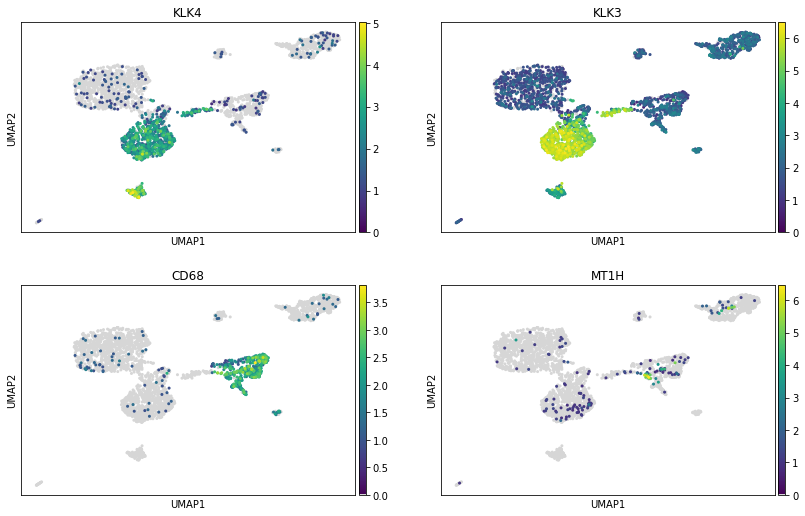

In [53]:
sc.pl.umap(adata, color = ['KLK4', 'KLK3', 'CD68', 'MT1H'], color_map = cmp(), ncols = 2)

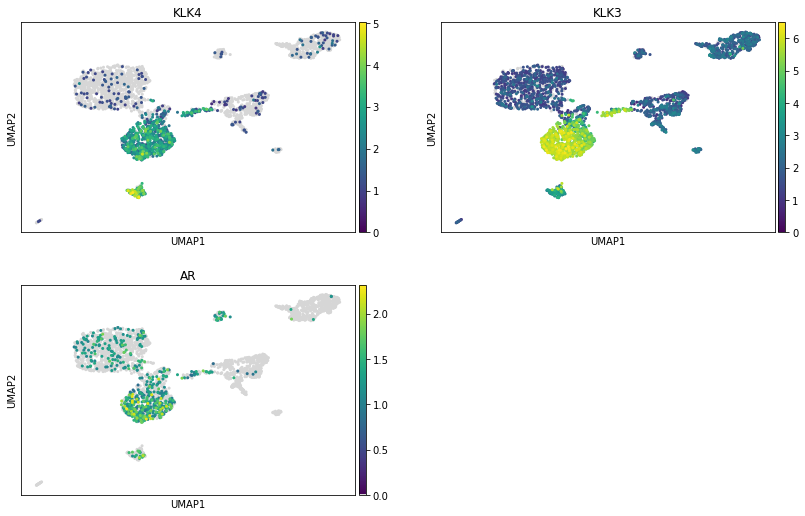

In [4]:
sc.pl.umap(adata, color = ['KLK4', 'KLK3', 'AR'], color_map = cmp(), ncols = 2)

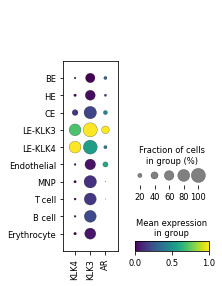

In [7]:
sc.pl.dotplot(adata, ['KLK4', 'KLK3', 'AR'], groupby = 'celltypes', standard_scale = 'var', color_map = 'viridis')